<a href="https://colab.research.google.com/github/pikey-msc/RiesgosFinancieros/blob/master/2021-1/Insumos/probit_logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"



/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 513 (delta 150), reused 0 (delta 0), pack-reused 311
Receiving objects: 100% (513/513), 17.97 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (333/333), done.


#Logit

In [ ]:
%%R

incump="RiesgosFinancieros/2020-2/Insumos/base_inc.csv"

data=read.csv(incump, sep=",", quote="/")

colors <- c("red", "blue", "darkgreen", "gold", "black")
attach(data)
n<-nrow(data)-1
m=ncol(data)
x=data[,3:m]
y=data[,2]
ylogr = glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper , family=binomial("logit"))
ylogr
xext=as.matrix(cbind(1,x))
summary(ylogr)


R[write to console]: The following objects are masked from data (pos = 3):

    AnOper, Apalanc, AscCl, Bancos, Cliente, Gop_SD, IFAudit, Incump,
    Liquid, PCP_CT, PLP_PT, Rentab, RetrTMP, UO_VN





Call:
glm(formula = y ~ Liquid + Apalanc + AscCl + Rentab + Bancos + 
    PCP_CT + Gop_SD + RetrTMP + PLP_PT + IFAudit + UO_VN + AnOper, 
    family = binomial("logit"))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.993e-05  -2.100e-08  -2.100e-08   2.100e-08   4.766e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)     86.097 345041.658   0.000    1.000
Liquid         -35.348  83217.419   0.000    1.000
Apalanc         63.663  74575.329   0.001    0.999
AscCl           -7.861  16526.692   0.000    1.000
Rentab        -395.216 893798.551   0.000    1.000
Bancos           8.519  48731.575   0.000    1.000
PCP_CT          47.308 128348.446   0.000    1.000
Gop_SD         -73.761 111142.606  -0.001    0.999
RetrTMP         -9.272 112996.503   0.000    1.000
PLP_PT        -102.053 384818.303   0.000    1.000
IFAudit         16.038  39775.381   0.000    1.000
UO_VN         -124.528 663892.384   0.000    1.000
AnOper 

In [ ]:
%%R
#Réplica de Devianza
Llogit=log(prod(((1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^y*(1-(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1))^(1-y)))
DLogit=-2*Llogit
print(DLogit)

print(ylogr$dev)


[1] 1.310612e-08
[1] 1.310611e-08


[1] "Matriz de confusión"
   
y     0   1
  0 126   0
  1   0 121


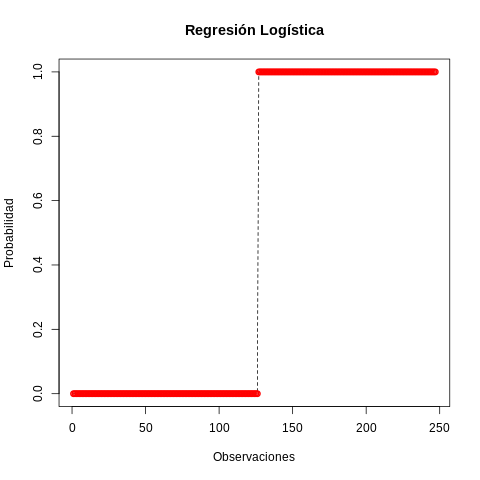

In [ ]:
%%R

ptol=0.5
yest=(1+exp(-xext%*%as.matrix(ylogr$coef)))^(-1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Logística")
points(yest, lwd=2, col=colors[1])



#Probit

In [ ]:
%%R
yprobr <- glm(y ~  Liquid  +  Apalanc  +  AscCl  +    Rentab  +Bancos  +  PCP_CT   +  Gop_SD + RetrTMP  +  PLP_PT + IFAudit  +UO_VN + AnOper, family=binomial("probit"))
yprobr
summary(yprobr)


Call:
glm(formula = y ~ Liquid + Apalanc + AscCl + Rentab + Bancos + 
    PCP_CT + Gop_SD + RetrTMP + PLP_PT + IFAudit + UO_VN + AnOper, 
    family = binomial("probit"))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.926e-05  -2.100e-08  -2.100e-08   2.100e-08   4.848e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  2.471e+01  9.547e+04   0.000    1.000
Liquid      -1.026e+01  2.310e+04   0.000    1.000
Apalanc      1.835e+01  2.157e+04   0.001    0.999
AscCl       -2.292e+00  5.684e+03   0.000    1.000
Rentab      -1.131e+02  2.929e+05   0.000    1.000
Bancos       2.413e+00  1.575e+04   0.000    1.000
PCP_CT       1.390e+01  3.383e+04   0.000    1.000
Gop_SD      -2.059e+01  3.389e+04  -0.001    1.000
RetrTMP     -2.470e+00  3.524e+04   0.000    1.000
PLP_PT      -2.985e+01  1.296e+05   0.000    1.000
IFAudit      4.724e+00  8.143e+03   0.001    1.000
UO_VN       -3.906e+01  2.158e+05   0.000    1.000
AnOper

In [ ]:
%%R
#Comprobación de devianza

Lprobit=log(prod((pnorm(xext%*%as.matrix(yprobr$coef),0,1))^y*(1-pnorm(xext%*%as.matrix(yprobr$coef),0,1))^(1-y)))
Dprobit=-2*Lprobit

print(Dprobit)
print(yprobr$dev)


[1] 1.276503e-08
[1] 1.276513e-08


[1] "Matriz de confusión"
   
y     0   1
  0 126   0
  1   0 121


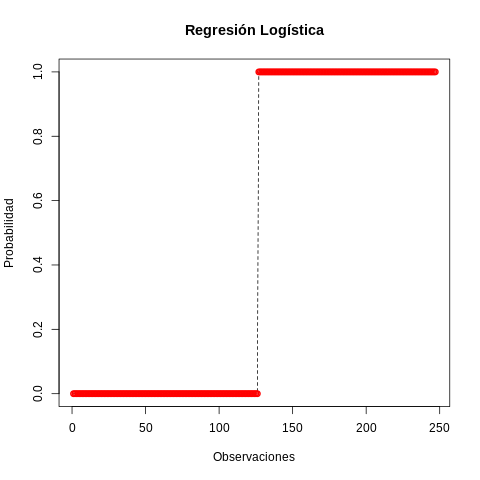

In [ ]:
%%R

ptol=0.5
yest=pnorm(xext%*%as.matrix(yprobr$coef),0,1)

#print(confusionMatrix(as.factor(y), as.factor(ylogr$fit)))
#matriz de confusión
print("Matriz de confusión")
print(table(y,ifelse(yest<0.5,0,1)))

plot(y,type="l", lty=2, xlab="Observaciones",
  ylab="Probabilidad", main="Regresión Logística")
points(yest, lwd=2, col=colors[1])
